<a href="https://colab.research.google.com/github/Badar97/Progetto_DataScience/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
pip install pyshp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import random

import geopandas as gpd
from shapely.geometry import shape, mapping, Point, Polygon, MultiPolygon
import fiona
import shapefile
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline

In [12]:
url = "https://raw.githubusercontent.com/Badar97/Progetto_DataScience/main/Python/NorwayMeteoDataCompleted.csv"
meteo = pd.read_csv(url)
meteo#.head()

,Unnamed: 0,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237624,237624,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,12,2021
237625,237625,SN98978,70.335700,28.964800,-11.25,89.0,2.6,-12.45,89.0,1.8,NaN,29,12,2021
237626,237626,SN299300,60.301111,19.131389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021
237627,237627,SN50110,60.337200,6.217500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,12,2021


In [13]:
dropp = ['Unnamed: 0']
meteo.drop(dropp, inplace=True, axis=1)
meteo.head()

,sourceId,latitude,longtitude,max(air_temperature P1D),max(relative_humidity P1D),max(wind_speed P1D),mean(air_temperature P1D),mean(relative_humidity P1D),mean(wind_speed P1D),sum(precipitation_amount P1D),day,month,year
0,SN100,61.134900,12.503900,NaN,NaN,NaN,NaN,NaN,NaN,0.4,1,1,2010
1,SN1135,58.990000,11.540800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2,SN1151800,50.100278,14.255556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
3,SN15262,61.674000,8.368500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
4,SN1531000,45.473056,28.032222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010


In [14]:
meteo = meteo.dropna()
meteo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21799 entries, 34 to 235248
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sourceId                       21799 non-null  object 
 1   latitude                       21799 non-null  float64
 2   longtitude                     21799 non-null  float64
 3   max(air_temperature P1D)       21799 non-null  float64
 4   max(relative_humidity P1D)     21799 non-null  float64
 5   max(wind_speed P1D)            21799 non-null  float64
 6   mean(air_temperature P1D)      21799 non-null  float64
 7   mean(relative_humidity P1D)    21799 non-null  float64
 8   mean(wind_speed P1D)           21799 non-null  float64
 9   sum(precipitation_amount P1D)  21799 non-null  float64
 10  day                            21799 non-null  int64  
 11  month                          21799 non-null  int64  
 12  year                           21799 non-nul

In [15]:
newname = {'sourceId': 'sourceID', 'latitude': 'Latitude', 'longtitude': 'Longitude',
           'max(air_temperature P1D)': 'max_air_temp_perday', 'max(relative_humidity P1D)': 'max_rel_hum_perday', 
           'max(wind_speed P1D)': 'max_wind_speed_perday','mean(air_temperature P1D)': 'mean_air_temp_perday',
           'mean(relative_humidity P1D)': 'mean_rel_hum_perday', 'mean(wind_speed P1D)': 'mean_wind_speed_perday', 
           'sum(precipitation_amount P1D)': 'sum_precip_amount_perday', 'day': 'Day', 'month': 'Month', 'year': 'Year'}
meteo.rename(columns=newname, inplace=True)
meteo.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,sourceID,Latitude,Longitude,max_air_temp_perday,max_rel_hum_perday,max_wind_speed_perday,mean_air_temp_perday,mean_rel_hum_perday,mean_wind_speed_perday,sum_precip_amount_perday,Day,Month,Year
34,SN69100,63.4597,10.9305,-2.3,83.0,4.1,-8.50,79.0,3.0,0.00,1,1,2010
40,SN91380,69.3875,20.2823,-9.2,86.0,5.1,-11.75,71.0,2.6,0.30,1,1,2010
41,SN91740,69.7887,20.9553,-8.4,72.0,8.9,-10.90,67.0,6.9,0.00,1,1,2010
80,SN69100,63.4597,10.9305,-13.4,84.0,4.6,-15.15,82.0,3.6,0.00,2,1,2010
86,SN91380,69.3875,20.2823,-8.7,79.0,3.3,-12.35,73.0,2.3,0.15,2,1,2010


# **2 Clustering**

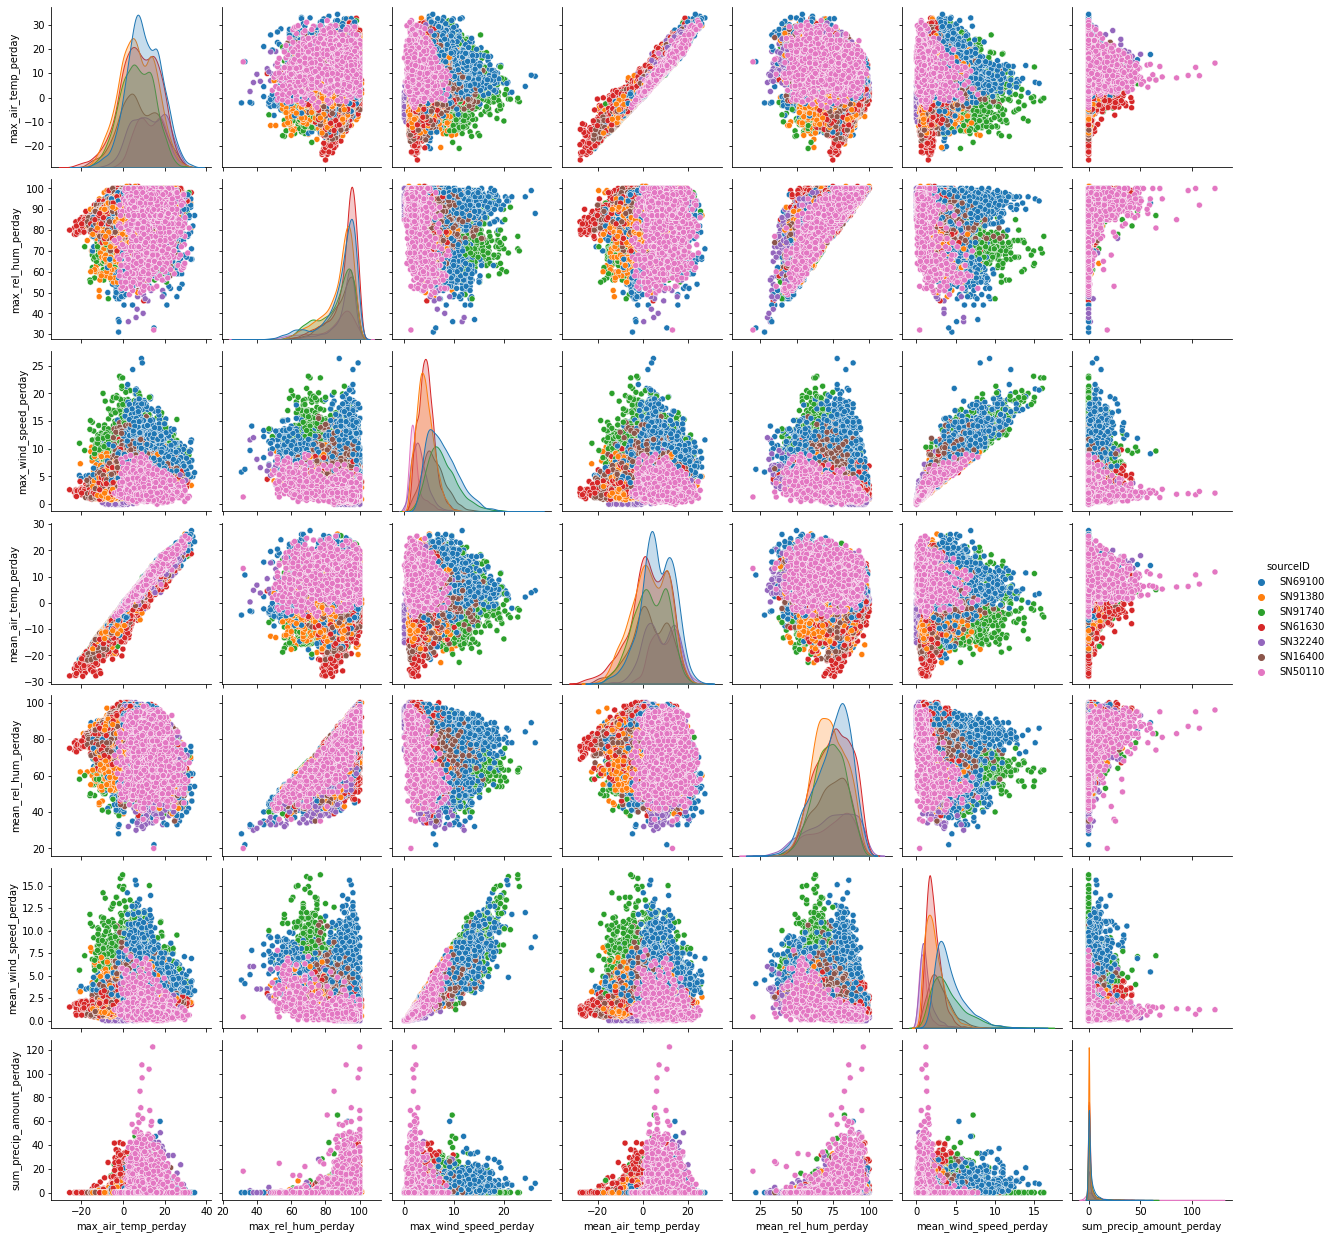

In [16]:
sns.pairplot(meteo.drop(['Latitude', 'Longitude', 'Year', 'Month', 'Day'], axis=1), hue='sourceID')

# 2.1 Clustering Bidimentionale

## Clustering Max_air_temp e Mean_rel_hum

In [17]:
x = meteo.iloc[:, [3, 7]].values
x

array([[-2.3, 79. ],
       [-9.2, 71. ],
       [-8.4, 67. ],
       ...,
       [13.5, 91. ],
       [13.2, 83. ],
       [11.1, 86. ]])

### Elbow Method

Text(0, 0.5, 'wcss')

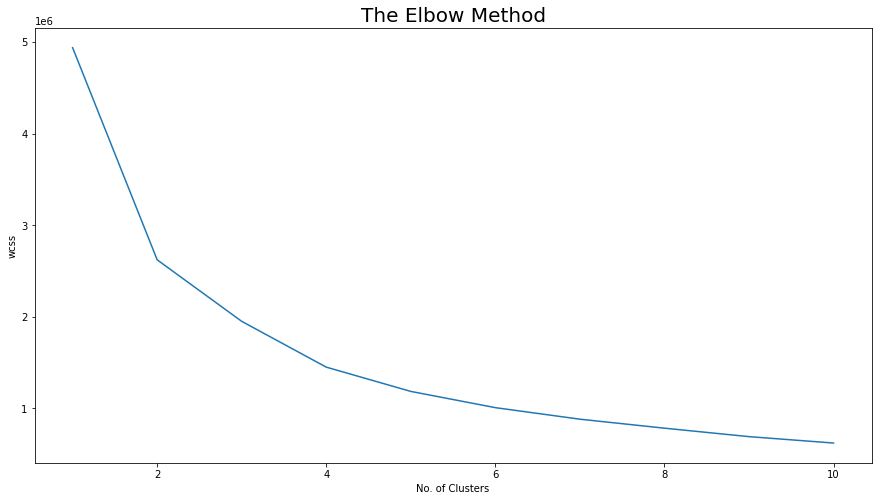

In [18]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

### K-Means

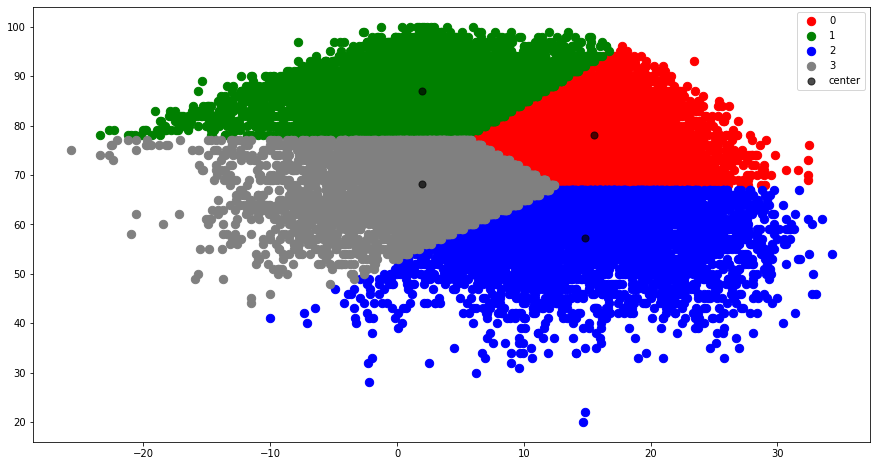

In [19]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x)
colors = ["red", "green", "blue","grey"]

plt.figure(figsize=(15,8))

for i in range(4):
  plt.scatter(x[y == i, 0], x[y == i, 1], s = 70, c = colors[i], label = i )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center", alpha=.7)

plt.legend()
plt.show()

### Silhouette

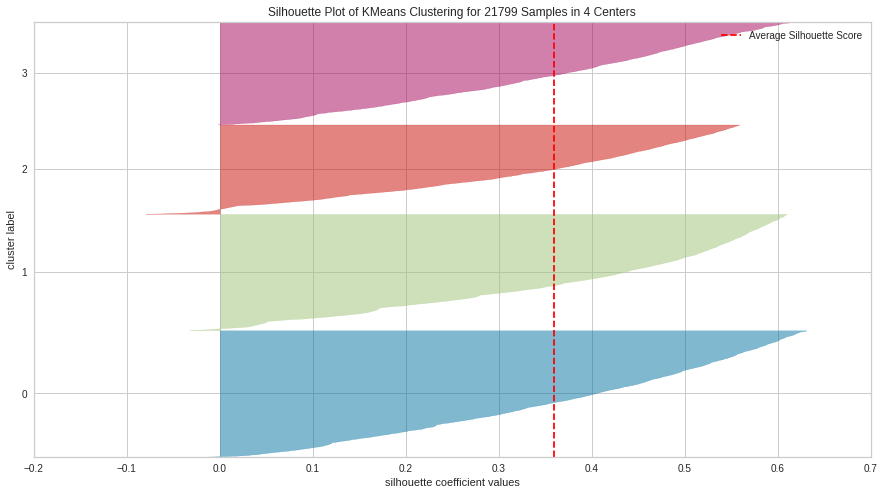

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Agglomerative Clustering

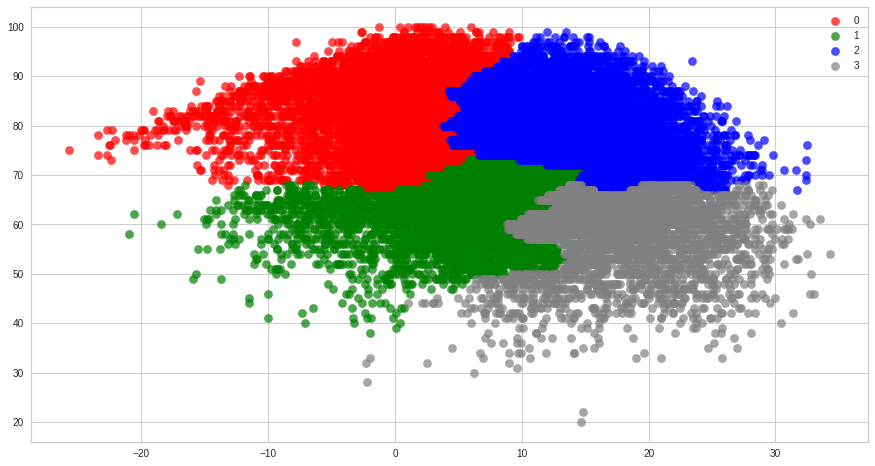

In [21]:
agg = AgglomerativeClustering(n_clusters = 4, linkage="ward")
y = agg.fit_predict(x)

plt.figure(figsize=(15,8))

for i in range(4):
  plt.scatter(x[y == i, 0], x[y == i, 1], s = 70, c = colors[i], label = i, alpha=.7 )

plt.legend()
plt.show()

## Clustering Mean_air_temp e Mean_rel_hum

In [22]:
x_1 = meteo.iloc[:, [6, 7]].values
x_1

array([[ -8.5 ,  79.  ],
       [-11.75,  71.  ],
       [-10.9 ,  67.  ],
       ...,
       [ 10.5 ,  91.  ],
       [ 10.7 ,  83.  ],
       [  8.75,  86.  ]])

### Elbow Method

Text(0, 0.5, 'wcss')

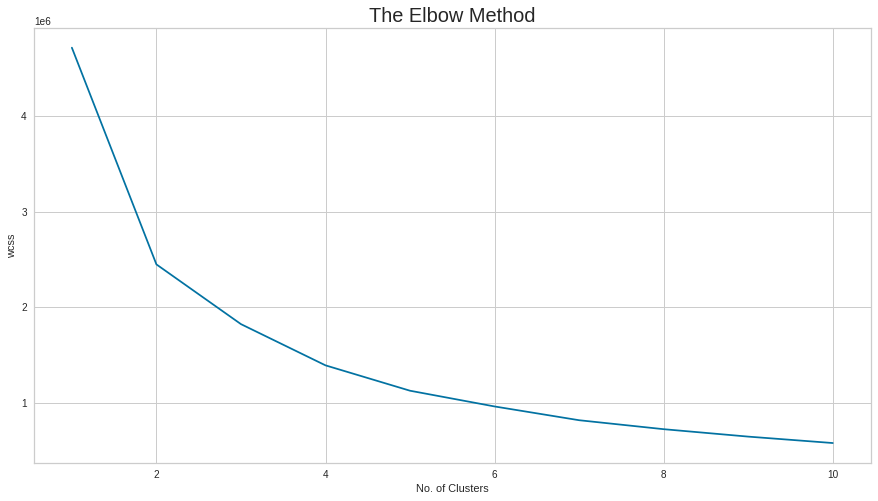

In [23]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_1)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

### K-Means

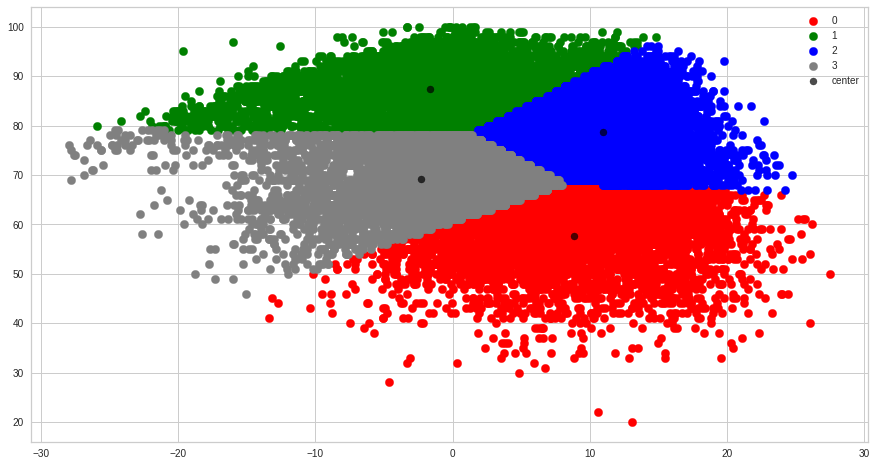

In [24]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = kmeans.fit_predict(x_1)
colors = ["red", "green", "blue","grey"]

plt.figure(figsize=(15,8))

for i in range(4):
  plt.scatter(x_1[y == i, 0], x_1[y == i, 1], s = 70, c = colors[i], label = i )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black', label="center", alpha=.7)

plt.legend()
plt.show()

### Silhouette

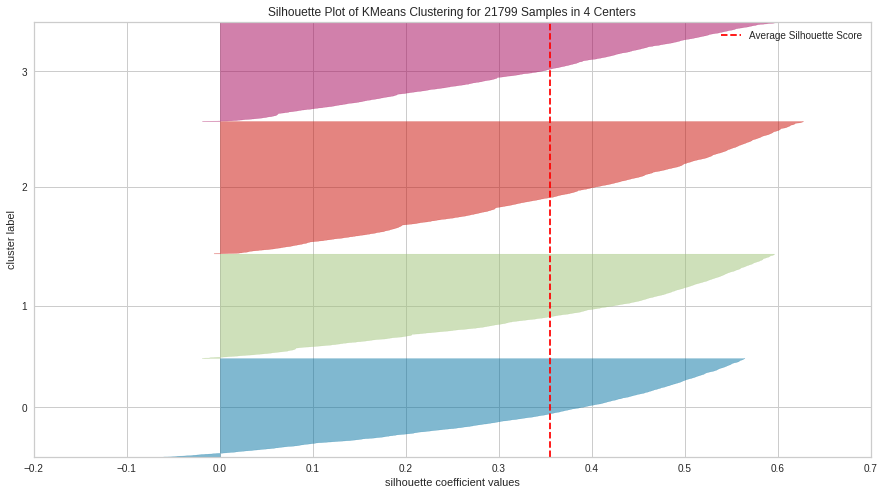

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters= 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x_1)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Agglomerative Clustering

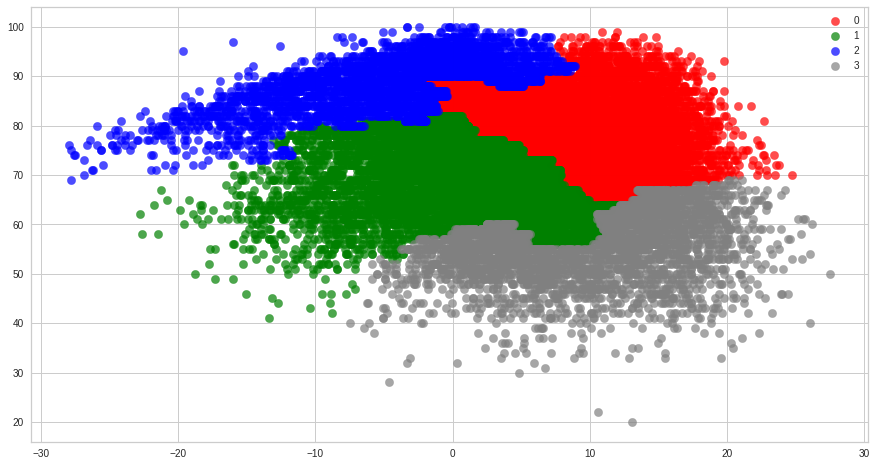

In [26]:
agg = AgglomerativeClustering(n_clusters = 4, linkage="ward")
y = agg.fit_predict(x_1)

plt.figure(figsize=(15,8))

for i in range(4):
  plt.scatter(x_1[y == i, 0], x_1[y == i, 1], s = 70, c = colors[i], label = i, alpha=.7 )

plt.legend()
plt.show()

# 2.2 All Clustering with PCA

In [27]:
x_All = meteo.iloc[:, [3, 4, 5, 6, 7, 8, 9]].values
x_All

array([[-2.3, 83. ,  4.1, ..., 79. ,  3. ,  0. ],
       [-9.2, 86. ,  5.1, ..., 71. ,  2.6,  0.3],
       [-8.4, 72. ,  8.9, ..., 67. ,  6.9,  0. ],
       ...,
       [13.5, 97. ,  1.5, ..., 91. ,  0.6, 27.6],
       [13.2, 95. ,  2.2, ..., 83. ,  1. , 45.4],
       [11.1, 96. ,  1.6, ..., 86. ,  0.7, 20.1]])

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver="auto").fit(x_All)
pca_x = pca.transform(x_All)

### Elbow Method

Text(0, 0.5, 'wcss')

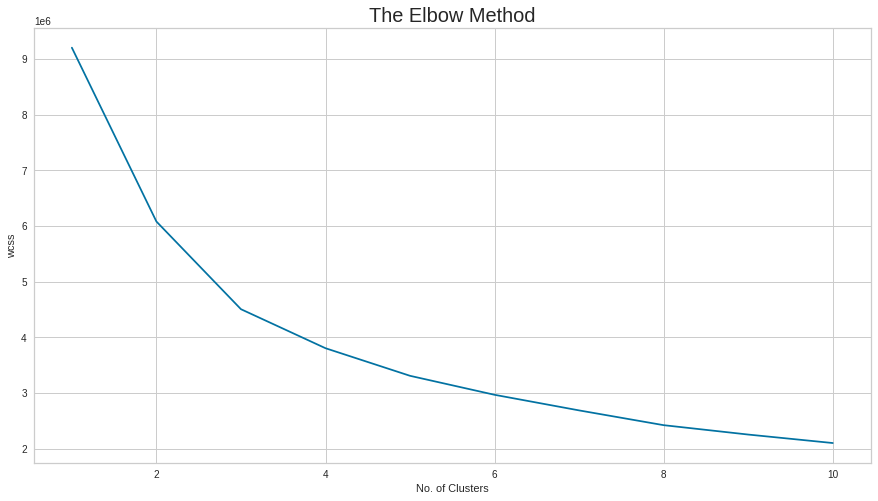

In [28]:
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x_All)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

### K-Means

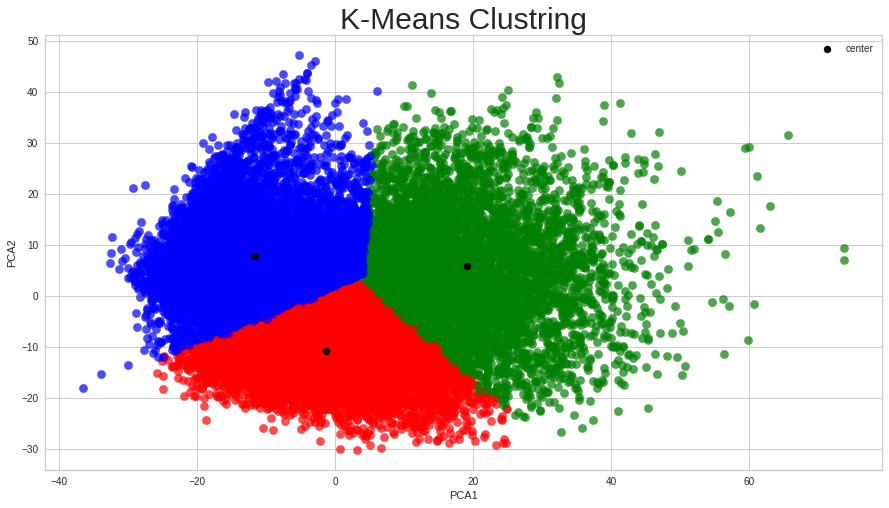

In [30]:
mod = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y = mod.fit_predict(x_All)
colors = ["red", "green", "blue"]


plt.figure(figsize=(15,8))
plt.title('K-Means Clustring', fontsize = 30)

for i in range(3):
  plt.scatter(pca_x[y == i, 0], pca_x[y == i, 1], s = 70, c = colors[i], alpha=.7)

centers = pca.transform(mod.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="center")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

### Silhouette

Valore medio: 0.3002030949789919


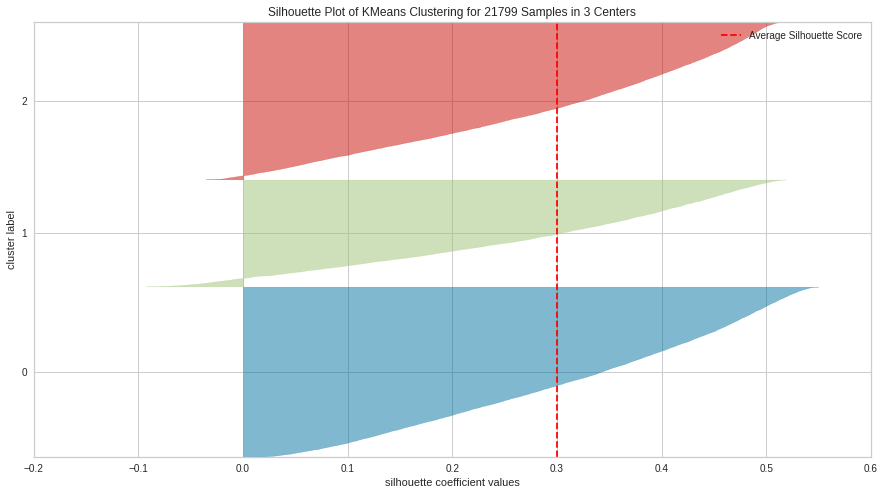

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer
import sklearn

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters= 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
print("Valore medio:",sklearn.metrics.silhouette_score(x_All, y)) #valore medio
visualizer.fit(x_All)        # Fit the data to the visualizer
visualizer.show()    

### Agglomerative Custering

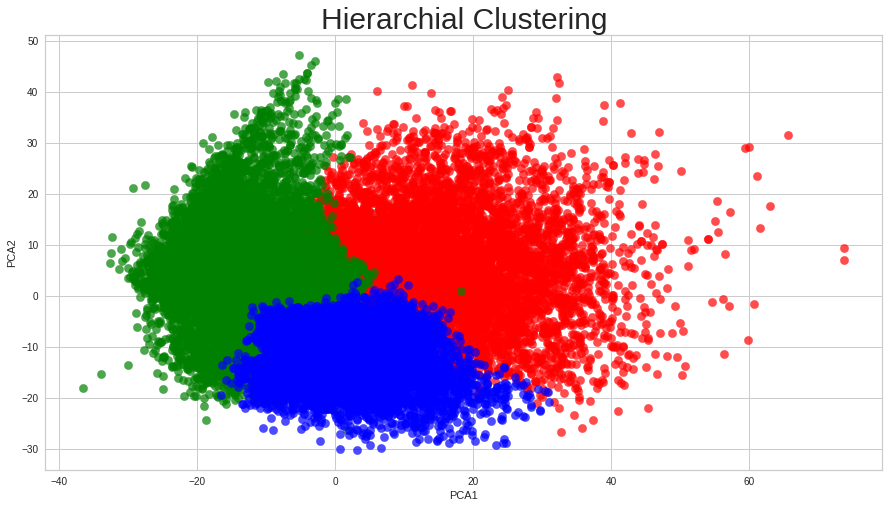

In [32]:
mod = AgglomerativeClustering(n_clusters = 3, linkage="ward")

y = mod.fit_predict(x_All)


plt.figure(figsize=(15,8))
plt.title('Hierarchial Clustering', fontsize = 30)


for i in range(3):
  plt.scatter(pca_x[y == i, 0], pca_x[y == i, 1], s = 70, c = colors[i], alpha=.7)


plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()